In [118]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
train_data = np.genfromtxt("mnist_train.csv", delimiter=',')
test_data = np.genfromtxt("mnist_test.csv", delimiter=',')
print(train_data.shape)
print(test_data.shape)
N_train = 60000
N_test = 10000
train_labels = train_data[:N_train, 0].astype(int)
train_images = train_data[:N_train, 1:].T/255
test_labels = test_data[:N_test, 0].astype(int)
test_images = test_data[:N_test, 1:].T/255
print(train_labels.shape)
print(train_images.shape)
print(test_labels.shape)
print(test_images.shape)

(60000, 785)
(10000, 785)
(60000,)
(784, 60000)
(10000,)
(784, 10000)


In [30]:
def softmax(x):
    max_elem = np.max(x, axis = 0)
    y = x - max_elem
    y = np.exp(y)
    sums = np.sum(y, axis = 0)
    return y / sums

In [31]:
def one_hot_encoding(y_label):
    C = int(y_label.max() + 1)
    enc = np.zeros((C, y_label.size))
    enc[y_label.astype(int), np.arange(y_label.size)] = 1
    return enc

In [104]:
eps = 1e-10

In [109]:
class NN:
    def __init__(self, sizes):
        self.w0 = np.random.randn(sizes[1],sizes[0])
        self.w1 = np.random.randn(sizes[2],sizes[1])
        self.mw0 = np.zeros_like(self.w0)
        self.mw1 = np.zeros_like(self.w1)
    
    
    #forward pass 
    def train(self, X, y_label, epochs = 20, alpha = 0.1, beta = 0.8): 
        y_one_hot = one_hot_encoding(y_label)
        for epoch in range(epochs):
            a0 = self.w0 @ X
            z0 = np.maximum(a0, 0)
            a1 = self.w1 @ z0
            y = softmax(a1)
            
            loss = -(np.log(y + eps) * y_one_hot).sum() / y_label.size
            accuracy = (np.argmax(y, axis = 0) == y_label). sum() / y_label.size
            
            #backward pass
            delta_a_1 = y - y_one_hot
            grad_w1 = delta_a_1 @ z0.T
            delta_z_0 = self.w1.T @ delta_a_1
            delta_a_0 = delta_z_0.copy()
            delta_a_0[a0<0] = 0
            grad_w0 = delta_a_0 @ X.T
            
            self.mw0 = beta * self.mw0 - alpha * grad_w0
            self.mw1 = beta * self.mw1 - alpha * grad_w1
            
            self.w0 += self.mw0
            self.w1 += self.mw1
            
            print("  Epoch:    ", epoch, "\n",
                " Loss:     ", loss, "\n",
                 " Accuracy: ", accuracy * 100, "%", "\n")
                 
                 
            
            
    def stochastic_train(self, X, y_label, epochs = 20, alpha = 0.1, beta = 0.8, mb_size = 100): 
        y_one_hot = one_hot_encoding(y_label)
        iters_per_epoch = int(y_label.size/mb_size)
        indices = np.arange(y_label.size)
            
        for epoch in range(epochs):
            np.random.shuffle(indices)
            X_sh = X[:, indices]
            y_one_sh = y_one_hot[:,  indices]

            for it in range(iters_per_epoch):
                X_iter = X_sh[:, it * mb_size:(it +  1) * mb_size]
                y_one_iter = y_one_sh[:, it * mb_size:(it + 1) * mb_size]

                a0 = self.w0 @ X_iter
                z0 = np.maximum(a0, 0)
                a1 = self.w1 @ z0
                y = softmax(a1)

                #backward pass
                delta_a_1 = y - y_one_iter
                grad_w1 = delta_a_1 @ z0.T
                delta_z_0 = self.w1.T @ delta_a_1
                delta_a_0 = delta_z_0.copy()
                delta_a_0[a0<0] = 0
                grad_w0 = delta_a_0 @ X_iter.T

                self.mw0 = beta * self.mw0 - alpha * grad_w0
                self.mw1 = beta * self.mw1 - alpha * grad_w1

                self.w0 += self.mw0
                self.w1 += self.mw1

            loss, accuracy = self.evaluate(X, y_label)
            print("  Epoch:    ", epoch, "\n",
                                " Loss:     ", loss, "\n",
                                 " Accuracy: ", accuracy * 100, "%", "\n")

            
    def evaluate (self, X, y_label):
        y_one_hot = one_hot_encoding(y_label)
        a0 = self.w0 @ X
        z0 = np.maximum(a0, 0)
        a1 = self.w1 @ z0
        y = softmax(a1)
        loss = -(np.log(y + eps) * y_one_hot).sum() / y_label.size
        accuracy = (np.argmax(y, axis = 0) == y_label). sum() / y_label.size
        return loss, accuracy

In [110]:
mnist_net = NN([784,100,10])
mnist_net.stochastic_train(train_images, train_labels, mb_size  = 100, epochs = 50, 
                           alpha = 1e-3, beta = 0.9 )

  Epoch:     0 
  Loss:      0.45983653049842454 
  Accuracy:  86.89166666666667 % 

  Epoch:     1 
  Loss:      0.3369895648449478 
  Accuracy:  90.62666666666667 % 

  Epoch:     2 
  Loss:      0.30453198974090573 
  Accuracy:  91.29666666666667 % 

  Epoch:     3 
  Loss:      0.2397895915132129 
  Accuracy:  93.02166666666668 % 

  Epoch:     4 
  Loss:      0.23616101024098005 
  Accuracy:  93.195 % 

  Epoch:     5 
  Loss:      0.19454968410455994 
  Accuracy:  94.28999999999999 % 

  Epoch:     6 
  Loss:      0.18222829501472262 
  Accuracy:  94.63833333333334 % 

  Epoch:     7 
  Loss:      0.19592897469491394 
  Accuracy:  94.325 % 

  Epoch:     8 
  Loss:      0.17042735390359018 
  Accuracy:  95.01666666666667 % 

  Epoch:     9 
  Loss:      0.19736157754263056 
  Accuracy:  94.60833333333333 % 

  Epoch:     10 
  Loss:      0.14990240859315557 
  Accuracy:  95.49333333333333 % 

  Epoch:     11 
  Loss:      0.1483166875462938 
  Accuracy:  95.585 % 

  Epoch:     1

In [117]:
loss, accuracy = mnist_net.evaluate(test_images, test_labels)
print(" Loss:     ", loss, "\n",
      "Accuracy: ", accuracy * 100, "%", "\n")

 Loss:      0.2696922159243394 
 Accuracy:  95.45 % 



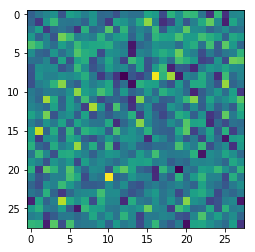

In [121]:
plt.imshow(mnist_net.w0[65].reshape(28,28))
plt.show()